In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import zipfile
import sklearn.linear_model
import sklearn.neighbors

In [2]:
zf = zipfile.ZipFile('./data/better_life_index.csv.zip') 
df_bli = pd.read_csv(zf.open('better_life_index.csv'))
zf = zipfile.ZipFile('./data/gdp.xls.zip') 
df_gdp = pd.read_csv(zf.open('gdp.xls'), delimiter='\t', encoding='latin1')

In [3]:
df_bli.head(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN


In [4]:
df_bli.tail(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2365,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2366,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN
2367,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,0.43,NaN,NaN


In [5]:
df_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2368 entries, 0 to 2367
Data columns (total 17 columns):
LOCATION                 2368 non-null object
Country                  2368 non-null object
INDICATOR                2368 non-null object
Indicator                2368 non-null object
MEASURE                  2368 non-null object
Measure                  2368 non-null object
INEQUALITY               2368 non-null object
Inequality               2368 non-null object
Unit Code                2368 non-null object
Unit                     2368 non-null object
PowerCode Code           2368 non-null int64
PowerCode                2368 non-null object
Reference Period Code    0 non-null float64
Reference Period         0 non-null float64
Value                    2368 non-null float64
Flag Codes               0 non-null float64
Flags                    0 non-null float64
dtypes: float64(5), int64(1), object(11)
memory usage: 314.6+ KB


In [6]:
df_gdp.head(3)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","3,995.383",2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","4,318.135",2014.0


In [7]:
df_gdp.tail(3)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,350.151",2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,064.350",2012.0
189,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
Country                          190 non-null object
Subject Descriptor               189 non-null object
Units                            189 non-null object
Scale                            189 non-null object
Country/Series-specific Notes    188 non-null object
2015                             187 non-null object
Estimates Start After            188 non-null float64
dtypes: float64(1), object(6)
memory usage: 10.5+ KB


In [9]:
# Some columns are not needed
# Some columns representated in two different ways:
print(df_gdp['Units'].value_counts(dropna=False))
print('-'*30)
print(df_gdp['Scale'].value_counts(dropna=False))
print('-'*30)
print(df_bli['Inequality'].value_counts(dropna=False))
print('-'*30)
print(df_bli['INEQUALITY'].value_counts(dropna=False))

U.S. dollars    189
NaN               1
Name: Units, dtype: int64
------------------------------
Units    189
NaN        1
Name: Scale, dtype: int64
------------------------------
Total    910
Women    578
Men      578
High     164
Low      138
Name: Inequality, dtype: int64
------------------------------
TOT    910
MN     578
WMN    578
HGH    164
LW     138
Name: INEQUALITY, dtype: int64


In [10]:
df_gdp.drop(['Subject Descriptor',
             'Units',
             'Scale',
             'Country/Series-specific Notes'], axis='columns', inplace=True)

# The 2015 column represents GDP per capita

df_gdp.rename(columns={
    '2015': 'GDP per capita',
    'Estimates Start After': 'Estimates Start Time'
}, inplace=True)

# Want 'Total' data only.
# Want countries as index and indicators as columns:

df_bli = df_bli[df_bli['Inequality'] == 'Total']
df_bli = df_bli.pivot(index="Country", columns="Indicator", values="Value")

In [11]:
# Finding all rows which contain a NaN to decide treatment.
df_gdp[df_gdp.isnull().any(axis=1)]

,Country,GDP per capita,Estimates Start Time
88,Kosovo,NaN,NaN
163,Syria,NaN,2010.0
189,"International Monetary Fund, World Economic Ou...",NaN,NaN


In [12]:
df_gdp.dropna(inplace=True)

In [13]:
# Making sure there are no duplicate countries
df_gdp['Country'].is_unique

True

In [14]:
# Making Country the index for a merge later.
df_gdp.set_index('Country', inplace=True, drop=True)

In [15]:
df_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [16]:
df_gdp.head()

,GDP per capita,Estimates Start Time
Country,,
Afghanistan,599.994,2013.0
Albania,"3,995.383",2010.0
Algeria,"4,318.135",2014.0
Angola,"4,100.315",2014.0
Antigua and Barbuda,"14,414.302",2011.0


In [17]:
# Combining on Country
df = pd.merge(left=df_bli, right=df_gdp,
              left_index=True, right_index=True)

In [18]:
df.to_csv('./data/country_data.zip', compression='gzip')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Australia to United States
Data columns (total 26 columns):
Air pollution                                        40 non-null float64
Dwellings without basic facilities                   37 non-null float64
Educational attainment                               39 non-null float64
Employees working very long hours                    38 non-null float64
Employment rate                                      40 non-null float64
Feeling safe walking alone at night                  40 non-null float64
Homicide rate                                        40 non-null float64
Household net adjusted disposable income             29 non-null float64
Household net wealth                                 27 non-null float64
Housing expenditure                                  38 non-null float64
Labour market insecurity                             33 non-null float64
Life expectancy                                      40 non-null float64
Life sa

In [20]:
# Need to investigate why GDP per capita is object instead of float64:

{type(val) for val in df['GDP per capita'].values}

{str}

In [21]:
df['GDP per capita'] = (df['GDP per capita']
                        .apply(lambda x: x.replace(',', ''))
                        .apply(float))

In [22]:
# Want correlation matrix rows/cols to be in alphabetical order
df = df[sorted(df.columns)]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(3)

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Estimates Start Time,Feeling safe walking alone at night,GDP per capita,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,Labour market insecurity,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Air pollution,1,0.23,0.0106,0.123,-0.517,0.0227,-0.36,-0.435,-0.00925,-0.385,-0.198,-0.205,0.146,-0.287,-0.553,0.282,-0.45,-0.7,-0.6,-0.433,0.0153,-0.182,-0.029,-0.206,-0.545,-0.34
Dwellings without basic facilities,0.23,1,-0.327,0.534,-0.493,-0.0577,-0.767,-0.547,0.704,-0.452,-0.428,-0.359,-0.0242,-0.845,-0.514,0.291,-0.596,-0.402,-0.57,-0.479,-0.00247,-0.595,-0.276,-0.232,-0.582,-0.5
Educational attainment,0.0106,-0.327,1,-0.642,0.504,0.424,0.446,0.293,-0.491,0.0697,0.0337,0.0527,-0.388,0.0892,0.27,-0.201,0.216,0.25,0.239,-0.0397,0.245,0.694,-0.388,-0.0892,0.402,0.268
Employees working very long hours,0.123,0.534,-0.642,1,-0.365,-0.286,-0.437,-0.299,0.441,0.188,0.428,-0.039,0.0254,-0.25,-0.174,-0.0149,-0.142,-0.267,-0.284,0.236,0.00796,-0.619,-0.221,0.0672,-0.373,-0.279
Employment rate,-0.517,-0.493,0.504,-0.365,1,0.331,0.628,0.481,-0.347,0.372,0.0893,0.213,-0.679,0.524,0.665,-0.733,0.477,0.527,0.426,0.102,0.144,0.55,-0.162,0.000283,0.726,0.24
Estimates Start Time,0.0227,-0.0577,0.424,-0.286,0.331,1,0.148,0.0955,-0.104,0.124,0.0573,0.272,-0.187,0.0498,0.162,-0.228,-0.0996,0.136,0.102,-0.0119,0.304,0.201,0.0637,-0.284,0.109,-0.28
Feeling safe walking alone at night,-0.36,-0.767,0.446,-0.437,0.628,0.148,1,0.683,-0.737,0.453,0.213,0.272,-0.234,0.692,0.594,-0.349,0.697,0.559,0.655,0.366,0.0412,0.755,0.139,0.153,0.74,0.448
GDP per capita,-0.435,-0.547,0.293,-0.299,0.481,0.0955,0.683,1,-0.444,0.843,0.661,0.164,-0.357,0.562,0.721,-0.286,0.899,0.565,0.67,0.519,0.05,0.449,0.235,0.411,0.624,0.211
Homicide rate,-0.00925,0.704,-0.491,0.441,-0.347,-0.104,-0.737,-0.444,1,-0.0207,-0.0464,-0.366,-0.00769,-0.584,-0.238,0.0803,-0.39,-0.25,-0.365,-0.17,0.0406,-0.741,-0.286,-0.136,-0.457,-0.499
Household net adjusted disposable income,-0.385,-0.452,0.0697,0.188,0.372,0.124,0.453,0.843,-0.0207,1,0.675,-0.0953,-0.388,0.458,0.713,-0.416,0.917,0.489,0.717,0.553,0.0096,0.174,0.175,0.451,0.476,-0.0585


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, Australia to United States
Data columns (total 26 columns):
Air pollution                                        40 non-null float64
Dwellings without basic facilities                   37 non-null float64
Educational attainment                               39 non-null float64
Employees working very long hours                    38 non-null float64
Employment rate                                      40 non-null float64
Estimates Start Time                                 40 non-null float64
Feeling safe walking alone at night                  40 non-null float64
GDP per capita                                       40 non-null float64
Homicide rate                                        40 non-null float64
Household net adjusted disposable income             29 non-null float64
Household net wealth                                 27 non-null float64
Housing expenditure                                  38 non-null float64
Labour 

/Users/ajay/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ajay/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


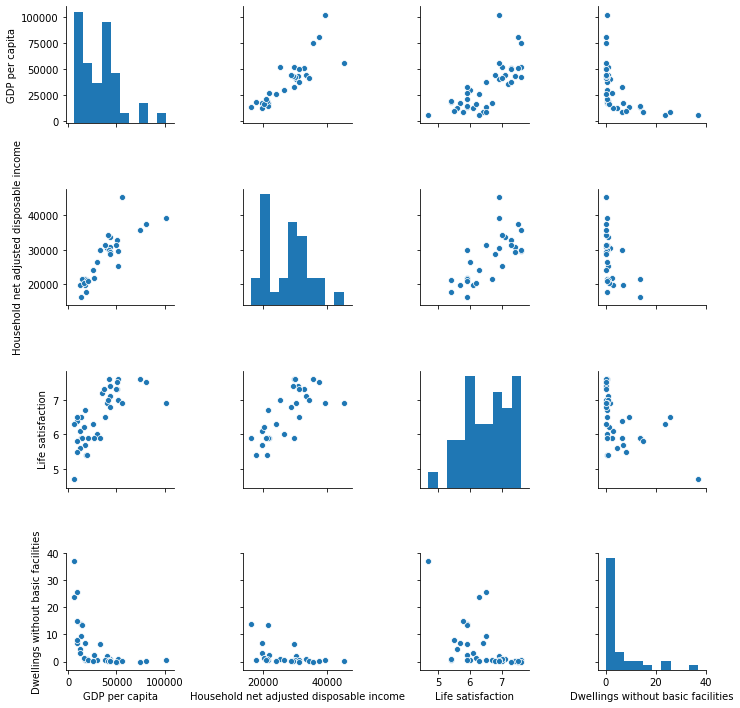

In [24]:
sns.pairplot(df[['GDP per capita',
                 'Household net adjusted disposable income',
                 'Life satisfaction',
                 'Dwellings without basic facilities']]);

In [25]:
# Modelling Life Satisfaction

In [26]:
X = np.c_[df['GDP per capita']]
y = np.c_[df['Life satisfaction']]

In [27]:
np.info(X)

class:  ndarray
shape:  (40, 1)
strides:  (8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7ff2752ae800
byteorder:  little
byteswap:  False
type: float64


In [28]:
np.info(y)

class:  ndarray
shape:  (40, 1)
strides:  (8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x7ff2752ae980
byteorder:  little
byteswap:  False
type: float64


In [29]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
model.coef_, model.intercept_

(array([[2.46904421e-05]]), array([5.72408177]))

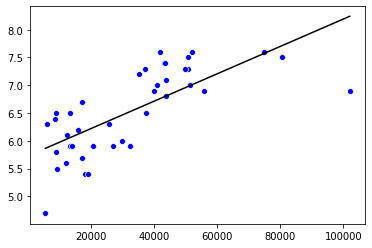

In [31]:
sns.scatterplot(X.flatten(), y.flatten(), color='b')
sns.lineplot(X.flatten(), model.predict(X).flatten(), color='k');

In [32]:
# Mean Sqaured Error
np.mean((y - model.predict(X))**2)

0.26531894738236

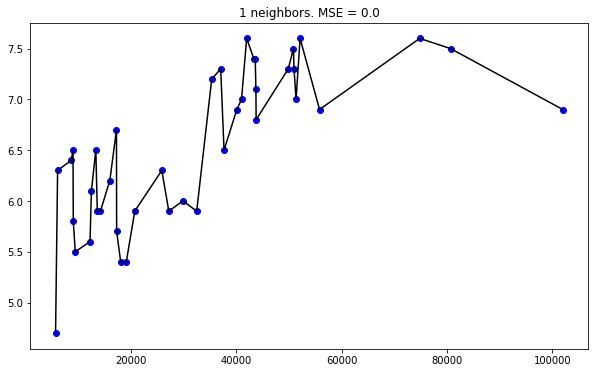

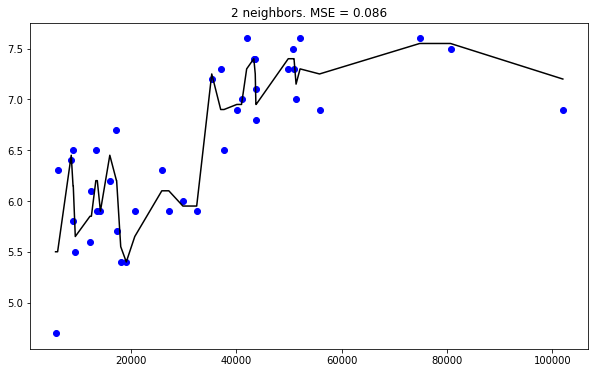

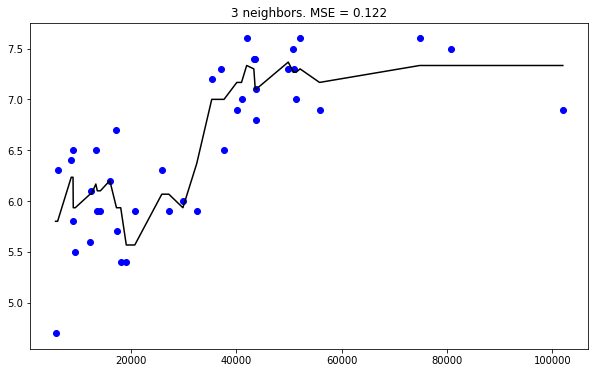

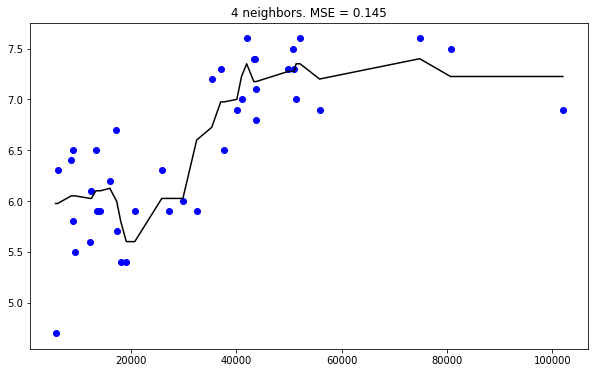

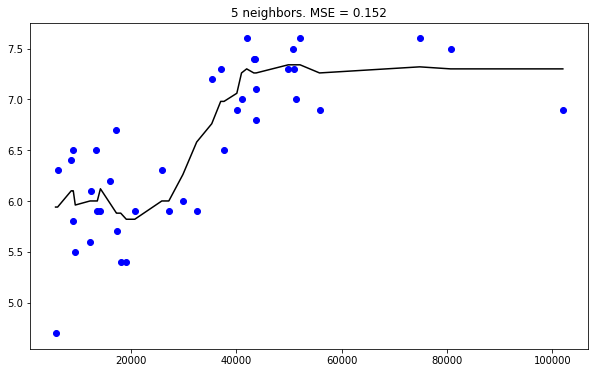

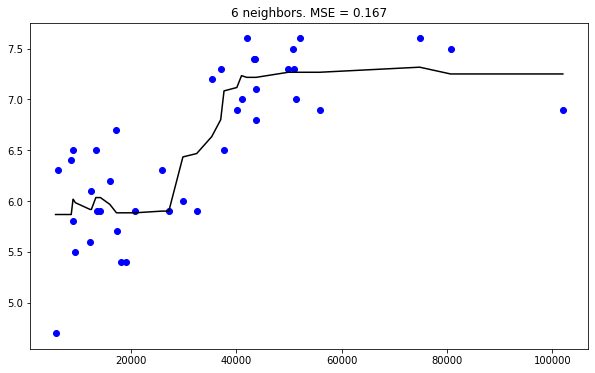

In [33]:
knn_models = {n: sklearn.neighbors.KNeighborsRegressor(n_neighbors=n)
              for n in range(1, 7)}

sorted_X = np.sort(X, axis=0)
for n, model in knn_models.items():
    model.fit(X, y)
    plt.figure(figsize=(10, 6))
    plt.scatter(X.flatten(), y.flatten(), color='b')
    plt.plot(sorted_X.flatten(),
             model.predict(sorted_X).flatten(),
             color='k');
    mse = np.mean((y - model.predict(X))**2)
    plt.xlabel('GDP per capita')
    plt.title(f"{n} neighbors. MSE = {round(mse, 3)}")